In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training=train_data.flow_from_directory('/content/drive/MyDrive/đồ ăn. test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 476 images belonging to 10 classes.


In [ ]:
training.class_indices

{'Nem chua ': 0,
 'bánh cuốn ': 1,
 'bánh giò ': 2,
 'bánh mì ': 3,
 'bánh pía ': 4,
 'bánh riêu': 5,
 'bún bò huế': 6,
 'cá kho tộ ': 7,
 'cháo lòng ': 8,
 'cơm tấm ': 9}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
train=model.fit(training,epochs=10,batch_size=128,verbose=1)
     

Epoch 1/10
15/15 [==============================] - 39s 3s/step - loss: 0.0825 - accuracy: 0.9769
Epoch 2/10
15/15 [==============================] - 39s 3s/step - loss: 0.0805 - accuracy: 0.9706
Epoch 3/10
15/15 [==============================] - 39s 3s/step - loss: 0.0578 - accuracy: 0.9853
Epoch 4/10
15/15 [==============================] - 42s 3s/step - loss: 0.0566 - accuracy: 0.9790
Epoch 5/10
15/15 [==============================] - 39s 3s/step - loss: 0.0349 - accuracy: 0.9895
Epoch 6/10
15/15 [==============================] - 40s 2s/step - loss: 0.0359 - accuracy: 0.9853
Epoch 7/10
15/15 [==============================] - 45s 3s/step - loss: 0.0328 - accuracy: 0.9874
Epoch 8/10
15/15 [==============================] - 40s 3s/step - loss: 0.0377 - accuracy: 0.9937
Epoch 9/10
15/15 [==============================] - 40s 3s/step - loss: 0.0489 - accuracy: 0.9853
Epoch 10/10
15/15 [==============================] - 40s 3s/step - loss: 0.0437 - accuracy: 0.9853


In [ ]:
 
model.save("/content/drive/MyDrive/Data_AI/VN_Food.h5")

In [ ]:
model_1=load_model('/content/drive/MyDrive/Data_AI/VN_Food.h5')

In [ ]:
folder="/content/drive/MyDrive/food_test/"

for i in os.listdir(folder):
  img=load_img(folder+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['banhcuon','banhmi','bunbo','banhpia','bunrieu','comtam','cakhoto','chaolong','nemchua','bunbohue']
  print(class_name[result])
  plt.show()

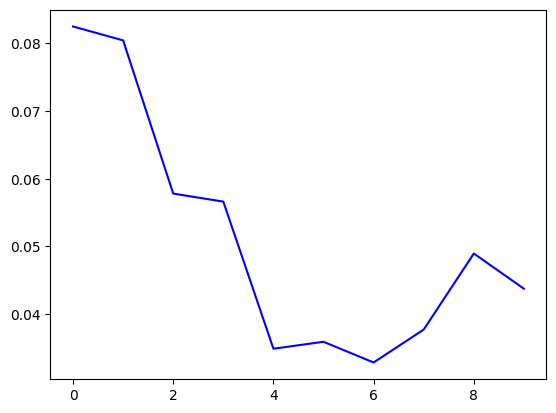

In [ ]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()